In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import os
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
os.chdir("C:/Users/Tom/Documents/Course/Semester 3/Project/Data Sets/")

In [3]:
### Bringing in all IAQ data sets and standardazing it all but the Calibration and House features

IAQ_LR = pd.read_csv("IAQ_livingroom.csv", parse_dates=['Date and Time'], index_col='Date and Time', dayfirst=True)

IAQ_LR[['Temp', 'RH', 'PM2.5', 'TVOC', 'CO2', 'CO', 'AirPres', 'Ozone', 
        'NO2']] = StandardScaler().fit_transform(IAQ_LR[['Temp', 'RH', 'PM2.5', 
                'TVOC', 'CO2', 'CO', 'AirPres', 'Ozone', 'NO2']])

IAQ_KR = pd.read_csv("IAQ_kitchen.csv", parse_dates=['Date and Time'], index_col='Date and Time', dayfirst=True)

IAQ_KR[['Temp', 'RH', 'PM2.5', 'TVOC', 'CO2', 'CO', 'AirPres', 'Ozone', 
        'NO2']] = StandardScaler().fit_transform(IAQ_KR[['Temp', 'RH', 'PM2.5', 
                'TVOC', 'CO2', 'CO', 'AirPres', 'Ozone', 'NO2']])
        
IAQ_BR = pd.read_csv("IAQ_bedroom.csv", parse_dates=['Date and Time'], index_col='Date and Time', dayfirst=True)

IAQ_BR[['Temp', 'RH', 'PM2.5', 'TVOC', 'CO2', 'CO', 'AirPres', 'Ozone', 
        'NO2']] = StandardScaler().fit_transform(IAQ_BR[['Temp', 'RH', 'PM2.5', 
                'TVOC', 'CO2', 'CO', 'AirPres', 'Ozone', 'NO2']])

c:\python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
#Bringing in the Activity datasets

activity_LR = pd.read_csv("activity_livingroom.csv", parse_dates=['Date and Time'], index_col='Date and Time', dayfirst=True)
activity_KR = pd.read_csv("activity_Kitchen.csv", parse_dates=['Date and Time'], index_col='Date and Time', dayfirst=True)
activity_BR = pd.read_csv("activity_Bedroom.csv", parse_dates=['Date and Time'], index_col='Date and Time', dayfirst=True)

## Living Room data sets:

In [5]:
#Joining the IAQ to the Activity datasets on the index, which is our DateTime
LR = pd.merge(IAQ_LR, activity_LR, left_index=True, right_index=True).merge(
        activity_KR, left_index=True, right_index=True).merge(
        activity_BR, left_index=True, right_index=True)

#Creating an Hour and timeOfDay variables to see how impactful some features can be
LR['Hour'] = LR.index.strftime('%H').astype(int)
LR["timeOfDay"]=pd.cut(LR.index.hour, [-1, 5, 11, 17, 24], labels=['Night', "Morning", 'Afternoon', 'Evening'])
LR["timeOfDay"] = LR["timeOfDay"].cat.codes

#Standardizing the activity features which are not binary
LR[['LR_MaxOccupancy', 'KR_MaxOccupancy', 'BR_MaxOccupancy', 'Hour', 
    'timeOfDay']] = StandardScaler().fit_transform(LR[['LR_MaxOccupancy', 
                'KR_MaxOccupancy', 'BR_MaxOccupancy', 'Hour', 'timeOfDay']])

#Here we keep a dataset with all Living Rooms to perhaps look for patterns, and a dataset per house
allLR = LR.dropna(axis=1).drop(["Calibration", "House"], axis=1)
LR1 = LR[(LR["House"] == 1) & (LR["Calibration"] == 0)].dropna(axis=1).drop(["Calibration", "House"], axis=1)
LR2 = LR[(LR["House"] == 2) & (LR["Calibration"] == 0)].dropna(axis=1).drop(["Calibration", "House"], axis=1)
LR3 = LR[(LR["House"] == 3) & (LR["Calibration"] == 0)].dropna(axis=1).drop(["Calibration", "House"], axis=1)

c:\python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Kitchen data sets:

In [6]:
KR = pd.merge(IAQ_KR, activity_KR, left_index=True, right_index=True).merge(
        activity_LR, left_index=True, right_index=True).merge(
        activity_BR, left_index=True, right_index=True)

KR['Hour'] = KR.index.strftime('%H').astype(int)
KR["timeOfDay"]=pd.cut(KR.index.hour, [-1, 5, 11, 17, 24], labels=['Night', "Morning", 'Afternoon', 'Evening']).astype('category')
KR["timeOfDay"] = KR["timeOfDay"].cat.codes

KR[['LR_MaxOccupancy', 'KR_MaxOccupancy', 'BR_MaxOccupancy', 'Hour', 
    'timeOfDay']] = StandardScaler().fit_transform(KR[['LR_MaxOccupancy', 
                'KR_MaxOccupancy', 'BR_MaxOccupancy', 'Hour', 'timeOfDay']])

allKR = KR.dropna(axis=1).drop(["Calibration", "House"], axis=1)
KR1 = KR[(KR["House"] == 1) & (KR["Calibration"] == 0)].dropna(axis=1).drop(["Calibration", "House"], axis=1)
KR2 = KR[(KR["House"] == 2) & (KR["Calibration"] == 0)].dropna(axis=1).drop(["Calibration", "House"], axis=1)
KR3 = KR[(KR["House"] == 3) & (KR["Calibration"] == 0)].dropna(axis=1).drop(["Calibration", "House"], axis=1)

c:\python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Bedroom data sets:

In [7]:
BR = pd.merge(IAQ_BR, activity_BR, left_index=True, right_index=True).merge(
        activity_LR, left_index=True, right_index=True).merge(
        activity_KR, left_index=True, right_index=True)

BR['Hour'] = BR.index.strftime('%H').astype(int)
BR["timeOfDay"]=pd.cut(BR.index.hour, [-1, 5, 11, 17, 24], labels=['Night', "Morning", 'Afternoon', 'Evening']).astype('category')
BR["timeOfDay"] = BR["timeOfDay"].cat.codes


BR[['LR_MaxOccupancy', 'KR_MaxOccupancy', 'BR_MaxOccupancy', 'Hour', 
    'timeOfDay']] = StandardScaler().fit_transform(BR[['LR_MaxOccupancy', 
                'KR_MaxOccupancy', 'BR_MaxOccupancy', 'Hour', 'timeOfDay']])

allBR = BR.dropna(axis=1).drop(["Calibration", "House"], axis=1)
BR1 = BR[(BR["House"] == 1) & (BR["Calibration"] == 0)].dropna(axis=1).drop(["Calibration", "House"], axis=1)
BR2 = BR[(BR["House"] == 2) & (BR["Calibration"] == 0)].dropna(axis=1).drop(["Calibration", "House"], axis=1)
BR3 = BR[(BR["House"] == 3) & (BR["Calibration"] == 0)].dropna(axis=1).drop(["Calibration", "House"], axis=1)

c:\python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Creating 3 Data sets, one for each house. Can use these to look for patterns

In [8]:
H1=pd.merge(LR1, IAQ_KR, left_index=True, right_index=True).merge(
        IAQ_BR, left_index=True, right_index=True)
H1 = H1.dropna(axis=1).drop(["Calibration_x", "House_x", "Calibration_y", "House_y"], axis=1)

H1 = H1.rename(columns={'Temp_x':'LR_Temp', 'RH_x':'LR_RH', 'PM2.5_x':'LR_PM2.5', 'TVOC_x':'LR_TVOC', 'CO2_x':'LR_CO2', 'CO_x':'LR_CO', 'AirPres_x':'LR_AirPres', 'Ozone_x':'LR_Ozone', 
                        'NO2_x':'LR_NO2', 'Temp_y':'KR_Temp', 'RH_y':'KR_RH', 'PM2.5_y':'KR_PM2.5', 'TVOC_y':'KR_TVOC', 'CO2_y':'KR_CO2', 'CO_y':'KR_CO', 'AirPres_y':'KR_AirPres', 'Ozone_y':'KR_Ozone', 
                        'NO2_y':'KR_NO2', 'Temp':'BR_Temp', 'RH':'BR_RH', 'PM2.5':'BR_PM2.5', 'TVOC':'BR_TVOC', 'CO2':'BR_CO2', 'CO':'BR_CO', 'AirPres':'BR_AirPres', 'Ozone':'BR_Ozone', 
                        'NO2':'BR_NO2'}) 

H2=pd.merge(LR2, IAQ_KR, left_index=True, right_index=True).merge(
        IAQ_BR, left_index=True, right_index=True)
H2 = H2.dropna(axis=1).drop(["Calibration_x", "House_x", "Calibration_y", "House_y"], axis=1)

H2 = H2.rename(columns={'Temp_x':'LR_Temp', 'RH_x':'LR_RH', 'PM2.5_x':'LR_PM2.5', 'TVOC_x':'LR_TVOC', 'CO2_x':'LR_CO2', 'CO_x':'LR_CO', 'AirPres_x':'LR_AirPres', 'Ozone_x':'LR_Ozone', 
                        'NO2_x':'LR_NO2', 'Temp_y':'KR_Temp', 'RH_y':'KR_RH', 'PM2.5_y':'KR_PM2.5', 'TVOC_y':'KR_TVOC', 'CO2_y':'KR_CO2', 'CO_y':'KR_CO', 'AirPres_y':'KR_AirPres', 'Ozone_y':'KR_Ozone', 
                        'NO2_y':'KR_NO2', 'Temp':'BR_Temp', 'RH':'BR_RH', 'PM2.5':'BR_PM2.5', 'TVOC':'BR_TVOC', 'CO2':'BR_CO2', 'CO':'BR_CO', 'AirPres':'BR_AirPres', 'Ozone':'BR_Ozone', 
                        'NO2':'BR_NO2'}) 

H3=pd.merge(LR3, IAQ_KR, left_index=True, right_index=True).merge(
        IAQ_BR, left_index=True, right_index=True)
H3 = H3.dropna(axis=1).drop(["Calibration_x", "House_x", "Calibration_y", "House_y"], axis=1)

H3 = H3.rename(columns={'Temp_x':'LR_Temp', 'RH_x':'LR_RH', 'PM2.5_x':'LR_PM2.5', 'TVOC_x':'LR_TVOC', 'CO2_x':'LR_CO2', 'CO_x':'LR_CO', 'AirPres_x':'LR_AirPres', 'Ozone_x':'LR_Ozone', 
                        'NO2_x':'LR_NO2', 'Temp_y':'KR_Temp', 'RH_y':'KR_RH', 'PM2.5_y':'KR_PM2.5', 'TVOC_y':'KR_TVOC', 'CO2_y':'KR_CO2', 'CO_y':'KR_CO', 'AirPres_y':'KR_AirPres', 'Ozone_y':'KR_Ozone', 
                        'NO2_y':'KR_NO2', 'Temp':'BR_Temp', 'RH':'BR_RH', 'PM2.5':'BR_PM2.5', 'TVOC':'BR_TVOC', 'CO2':'BR_CO2', 'CO':'BR_CO', 'AirPres':'BR_AirPres', 'Ozone':'BR_Ozone', 
                        'NO2':'BR_NO2'}) 

### Creating a function to split accordingly to either having all features or just activity

In [9]:
def train_test (df, target, allVars):
        
    if allVars == "all":
        X = df.drop([target], axis=1)
    elif allVars == "noIAQ_room":
        X = df.drop(['Temp', 'RH', 'PM2.5', 'TVOC', 
                'CO2', 'CO', 'AirPres', 'Ozone', 'NO2'], axis=1)
        
    elif allVars == "noIAQ_house":
        X = df.drop(['LR_Temp', 'LR_RH', 'LR_PM2.5', 'LR_TVOC', 'LR_CO2', 'LR_CO', 'LR_AirPres', 'LR_Ozone', 'LR_NO2', 
                     'BR_Temp', 'BR_RH', 'BR_PM2.5', 'BR_TVOC', 'BR_CO2', 'BR_CO', 'BR_AirPres', 'BR_Ozone', 'BR_NO2', 
                     'KR_Temp', 'KR_RH', 'KR_PM2.5', 'KR_TVOC', 'KR_CO2', 'KR_CO', 'KR_AirPres', 'KR_Ozone', 'KR_NO2'], axis=1)
        
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42)
    
    return (X_train, X_test, y_train, y_test, X, y)

### Here we select the room we want, the variable and if we want to use just activity features or everything

In [10]:
#Room - BR3
#Target: CO2
#Features: Occupant Activity

X_train, X_test, y_train, y_test, X, y = train_test(BR3, "CO2", "noIAQ_room")

In [11]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()


c:\python\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     18.92
Date:                Sun, 24 Mar 2019   Prob (F-statistic):           1.10e-28
Time:                        19:23:01   Log-Likelihood:                -132.85
No. Observations:                 139   AIC:                             311.7
Df Residuals:                     116   BIC:                             379.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3833      0.523      0.733      0.465      -0.652       1.419
BR_MaxOccupancy      0.7622      0.091      8.338      0.000       0.581       0.943
BR_OpenWindows      -0.3049      0.447     -0.682      0.496      -1.190       0.580
BR_OpenDoor         -0.5139      0.219     -2.342      0.021      -0.948      -0.079
BR_OpenCurtains     -0.1353      0.217     -0.622      0.535      -0.566       0.295
BR_HeatingOn         0.0426      0.054      0.792      0.430      -0.064       0.149
BR_Hoovering        -1.9366      1.403     -1.380      0.170      -4.716       0.843
BR_Mopping          -0.3049      0.447     -0.682      0.496      -1.190       0.580
LR_MaxOccupancy     -0.3324      0.108     -3.066      0.003      -0.547      -0.118
LR_OpenWindow        1.1469      0.962      1.192      0.236      -0.759       3.052
LR_OpenDoor         -0.3097      0.365     -0.848      0.398      -1.033       0.414
LR_OpenCurtains      0.1996      0.448      0.446      0.657      -0.688       1.087
LR_HeatingOn         0.0426      0.054      0.792      0.430      -0.064       0.149
LR_Hoovering        -0.9918      1.118     -0.887      0.377      -3.206       1.222
LR_Mopping           0.9610      0.438      2.194      0.030       0.094       1.828
KR_MaxOccupancy     -0.0807      0.177     -0.457      0.648      -0.430       0.269
KR_OpenDoor          1.0966      0.659      1.664      0.099      -0.208       2.402
Boiling              0.4049      0.523      0.774      0.440      -0.631       1.441
Frying               1.1219      1.225      0.916      0.362      -1.305       3.549
KR_HeatingOn         0.0426      0.054      0.792      0.430      -0.064       0.149
KR_Hoovering         0.0564      0.733      0.077      0.939      -1.395       1.508
KR_Mopping           0.9610      0.438      2.194      0.030       0.094       1.828
DishwasherOn        -0.2899      0.975     -0.297      0.767      -2.221       1.641
WashingMachineOn     1.3824      0.726      1.905      0.059      -0.055       2.819
Toaster              0.1895      1.006      0.188      0.851      -1.802       2.181
Hour                 0.2853      0.264      1.081      0.282      -0.238       0.808
timeOfDay           -0.2273      0.272     -0.836      0.405      -0.766       0.311
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.598
Skew:                          -0.141   Prob(JB):                        0.742
Kurtosis:                       3.154   Cond. No.                     1.20e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance m

In [12]:
#--------------------------- Linear Regression ---------------------------#
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)
y_pred = model.predict(X_test)

print('Coefficients: \n', model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Cross Validation scores: \n',cross_val_score(model, X_train, y_train, cv=10))

Coefficients: 
 [ 6.55737486e-01 -2.30983764e-01 -8.52279311e-01 -1.53138931e-01
  7.12242924e-02 -1.56826753e+00 -2.30983764e-01 -2.44951686e-01
  1.26099085e+00 -5.47542410e-01  3.02570847e-01  7.12242924e-02
 -1.77635684e-15  1.02212526e+00 -5.68177536e-03  1.63610318e+00
  3.12130814e-01  8.75228549e-01  7.12242924e-02  5.02398028e-02
  1.02212526e+00 -2.75482623e-01  1.20298971e+00  2.56775766e-01
  1.85191505e-01 -1.39189405e-01]
Mean squared error: 0.62
Variance score: 0.71
Cross Validation scores: 
 [ 0.69772272  0.64530221  0.61381813  0.43256434 -0.68306062  0.88917253
  0.58358824  0.69235901  0.09159903  0.724787  ]


In [13]:
#--------------------------- Decision Tree ---------------------------#
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_train, y_train)
y_pred= model.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Cross Validation scores: \n',cross_val_score(model, X_train, y_train, cv=10))

Mean squared error: 0.28
Variance score: 0.87
Cross Validation scores: 
 [0.82863364 0.70105572 0.80003568 0.47161461 0.43681755 0.90445285
 0.95089235 0.71169427 0.8135423  0.73048578]


In [14]:
#--------------------------- Random Forest ---------------------------#
model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model.fit(X, y)
y_pred = model.predict(X_test)

print('Mean Absolute Error:', round(mean_absolute_error(y_test, y_pred),2), 'degrees.')
print('Mean Squared Error:',round(mean_squared_error(y_test, y_pred),4))
print('Accuracy:', r2_score(y_test, y_pred))
print('Cross Validation scores: \n',cross_val_score(model, X_train, y_train, cv=10))

Mean Absolute Error: 0.19 degrees.
Mean Squared Error: 0.0638
Accuracy: 0.9700993384856587
Cross Validation scores: 
 [0.84586528 0.78670801 0.84200894 0.57350467 0.51997281 0.92860853
 0.87155397 0.78575908 0.91571721 0.7736834 ]


In [15]:
#Room - BR3
#Target: CO2
#Features: Occupant Activity + IAQ

X_train, X_test, y_train, y_test, X, y = train_test(BR3, "CO2", "all")

In [17]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

c:\python\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     47.66
Date:                Sun, 24 Mar 2019   Prob (F-statistic):           2.79e-49
Time:                        19:23:53   Log-Likelihood:                -56.933
No. Observations:                 139   AIC:                             173.9
Df Residuals:                     109   BIC:                             261.9
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Temp                 1.3542      0.285      4.753      0.000       0.790       1.919
RH                   0.9802      0.182      5.394      0.000       0.620       1.340
PM2.5               -0.2441      0.090     -2.703      0.008      -0.423      -0.065
TVOC                 0.3521      0.047      7.541      0.000       0.260       0.445
CO                  21.4663     23.095      0.929      0.355     -24.307      67.240
AirPres             -0.2331      0.080     -2.905      0.004      -0.392      -0.074
Ozone                0.7890      0.667      1.182      0.240      -0.534       2.112
NO2                 -0.5575      0.331     -1.686      0.095      -1.213       0.098
BR_MaxOccupancy      0.3444      0.064      5.387      0.000       0.218       0.471
BR_OpenWindows      -0.1826      0.280     -0.653      0.515      -0.737       0.372
BR_OpenDoor         -0.4549      0.137     -3.321      0.001      -0.726      -0.183
BR_OpenCurtains     -0.2223      0.134     -1.653      0.101      -0.489       0.044
BR_HeatingOn        -0.0959      0.037     -2.574      0.011      -0.170      -0.022
BR_Hoovering        -0.4597      0.866     -0.531      0.597      -2.177       1.257
BR_Mopping          -0.1826      0.280     -0.653      0.515      -0.737       0.372
LR_MaxOccupancy      0.0096      0.070      0.138      0.891      -0.128       0.148
LR_OpenWindow        0.1396      0.585      0.239      0.812      -1.020       1.299
LR_OpenDoor         -0.1281      0.227     -0.565      0.573      -0.577       0.321
LR_OpenCurtains      0.1129      0.284      0.397      0.692      -0.451       0.677
LR_HeatingOn        -0.0959      0.037     -2.574      0.011      -0.170      -0.022
LR_Hoovering        -0.2863      0.689     -0.416      0.678      -1.651       1.078
LR_Mopping           0.3279      0.271      1.208      0.230      -0.210       0.866
KR_MaxOccupancy     -0.0618      0.110     -0.562      0.575      -0.279       0.156
KR_OpenDoor         -0.0896      0.425     -0.211      0.833      -0.932       0.753
Boiling              0.6858      0.371      1.851      0.067      -0.049       1.420
Frying               0.6221      0.773      0.804      0.423      -0.911       2.155
KR_HeatingOn        -0.0959      0.037     -2.574      0.011      -0.170      -0.022
KR_Hoovering        -0.2605      0.445     -0.585      0.560      -1.143       0.622
KR_Mopping           0.3279      0.271      1.208      0.230      -0.210       0.866
DishwasherOn        -0.1004      0.604     -0.166      0.868      -1.298       1.097
WashingMachineOn     0.7381      0.452      1.634      0.105      -0.157       1.633
Toaster             -0.0692      0.613     -0.113      0.910      -1.285       1.147
Hour                 0.1304      0.167      0.782      0.436      -0.200       0.461
timeOfDay            0.

In [18]:
#--------------------------- Linear Regression ---------------------------#
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)
y_pred = model.predict(X_test)

print('Coefficients: \n', model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Cross Validation scores: \n',cross_val_score(model, X_train, y_train, cv=10))

Coefficients: 
 [ 1.19201424e+00  7.91018990e-01 -1.93479753e-01  3.44152818e-01
  4.44089210e-16 -2.97945027e-01  3.03247287e-01 -3.88107447e-01
  3.65398808e-01 -2.25373712e-01 -6.25289729e-01 -1.87476907e-01
 -9.17409585e-02 -3.82684074e-01 -2.25373712e-01  5.39802354e-02
  2.97266916e-01 -1.59684056e-01  1.29315315e-01 -9.17409585e-02
  0.00000000e+00  4.05038208e-01 -3.86287716e-02  1.96131732e-02
  6.34794456e-01  4.50687555e-01 -9.17409585e-02 -1.99026391e-01
  4.05038208e-01 -6.53762559e-02  6.89407629e-01  2.02988008e-02
  9.06790816e-02  3.27931173e-02]
Mean squared error: 0.18
Variance score: 0.91
Cross Validation scores: 
 [0.89223907 0.88169475 0.86961751 0.85136899 0.58356039 0.92286589
 0.87600801 0.75772892 0.75777851 0.91733286]


In [19]:
#--------------------------- Decision Tree ---------------------------#
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_train, y_train)
y_pred= model.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Cross Validation scores: \n',cross_val_score(model, X_train, y_train, cv=10))

Mean squared error: 0.48
Variance score: 0.78
Cross Validation scores: 
 [0.87929445 0.7161688  0.87857113 0.11721791 0.48219403 0.90487585
 0.91157582 0.91907902 0.72937084 0.78593647]


In [20]:
#--------------------------- Random Forest ---------------------------#
model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model.fit(X, y)
y_pred = model.predict(X_test)

print('Mean Absolute Error:', round(mean_absolute_error(y_test, y_pred),2), 'degrees.')
print('Mean Squared Error:',round(mean_squared_error(y_test, y_pred),4))
print('Accuracy:', r2_score(y_test, y_pred))
print('Cross Validation scores: \n',cross_val_score(model, X_train, y_train, cv=10))

Mean Absolute Error: 0.08 degrees.
Mean Squared Error: 0.0165
Accuracy: 0.992288477679325
Cross Validation scores: 
 [0.92248965 0.93754119 0.88963166 0.67364974 0.80754777 0.97340851
 0.95231795 0.93262207 0.82150562 0.83813009]


# Visualisations

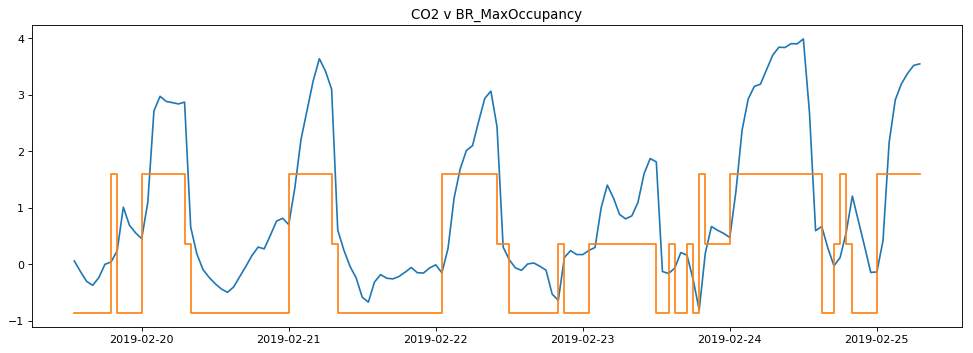

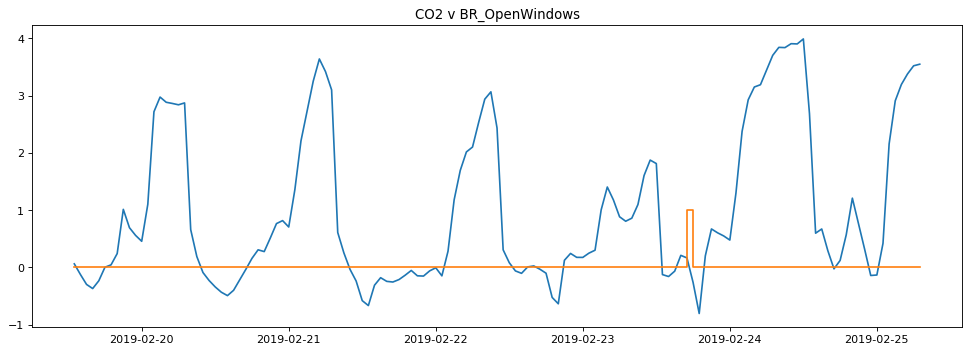

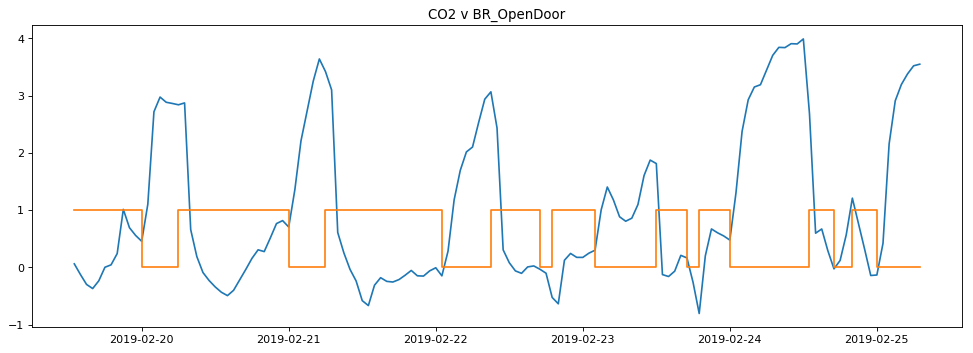

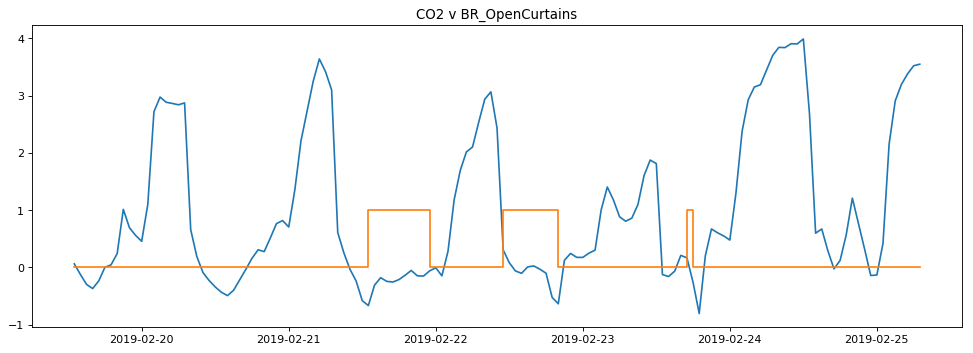

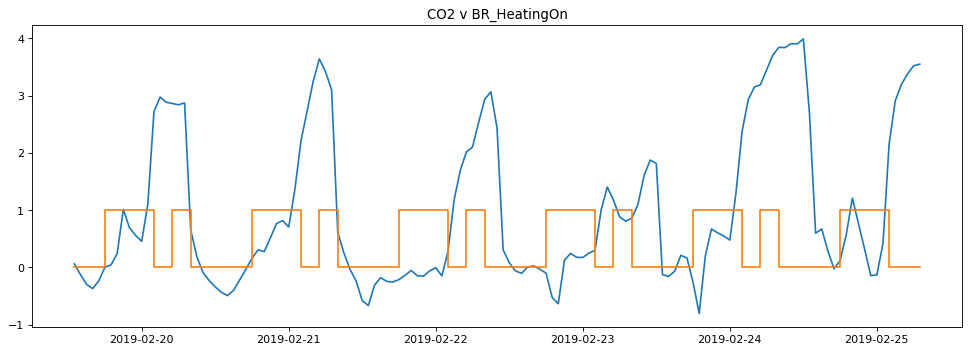

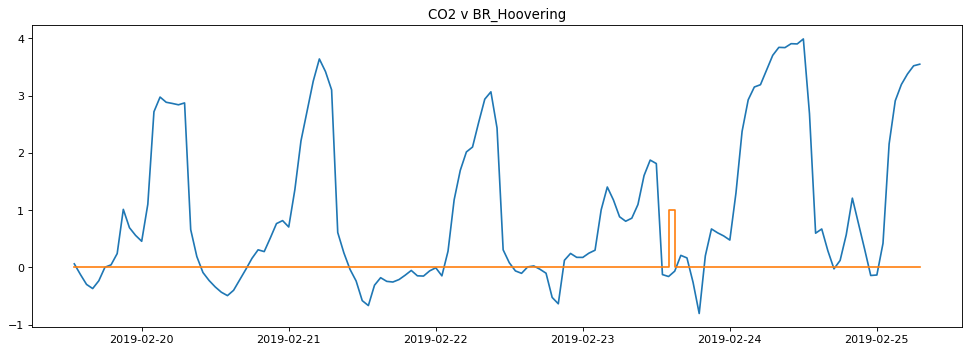

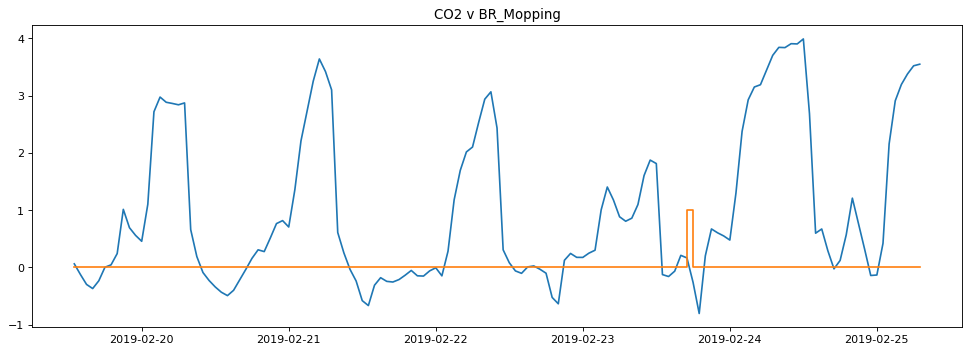

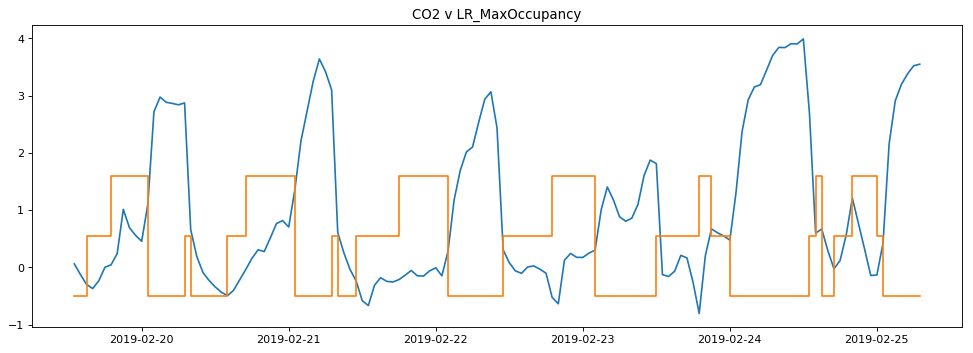

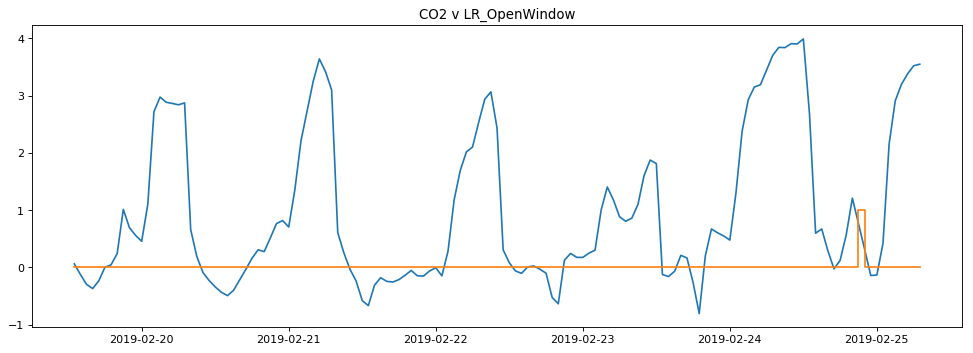

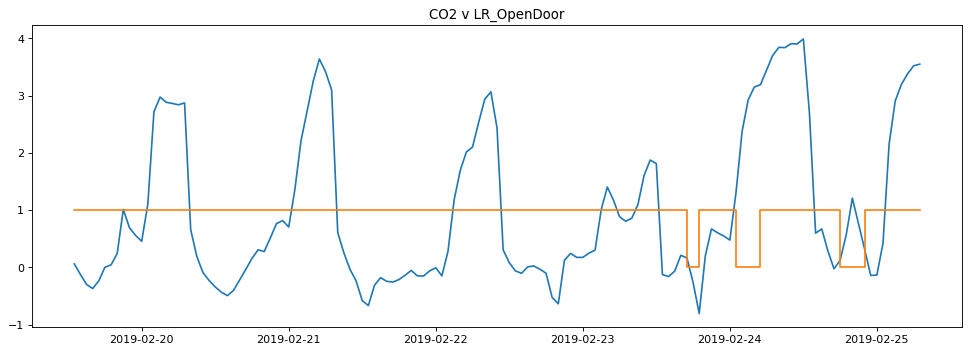

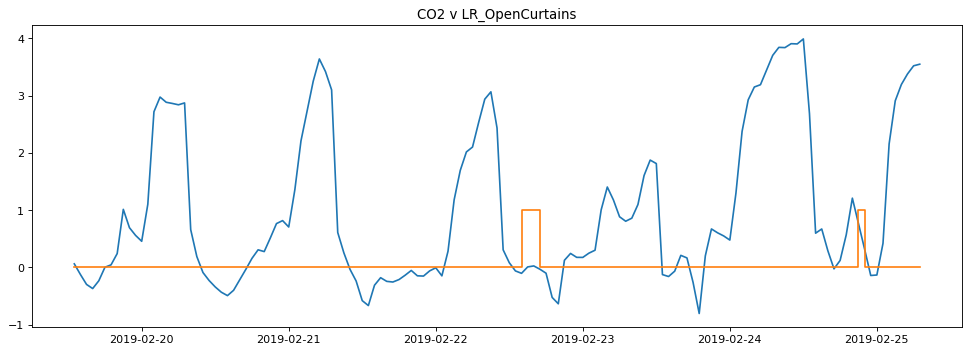

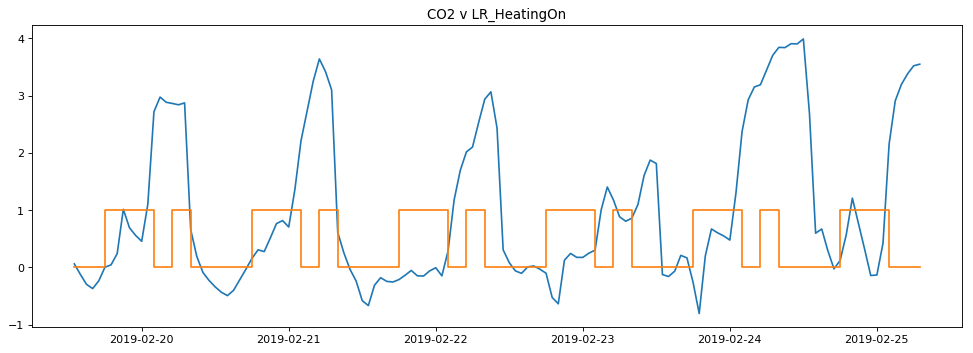

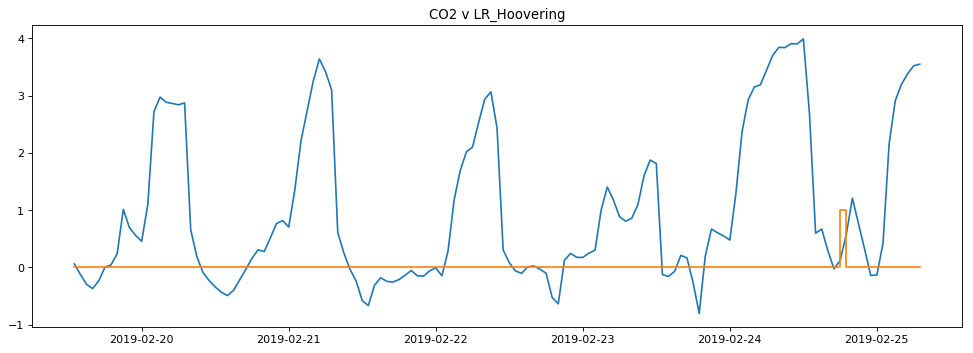

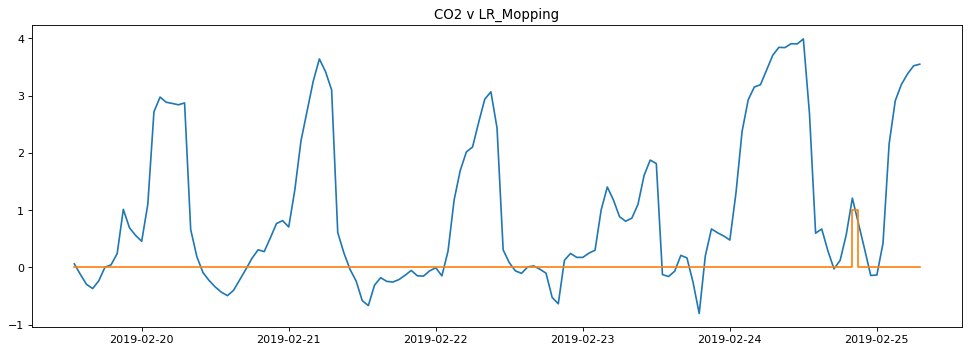

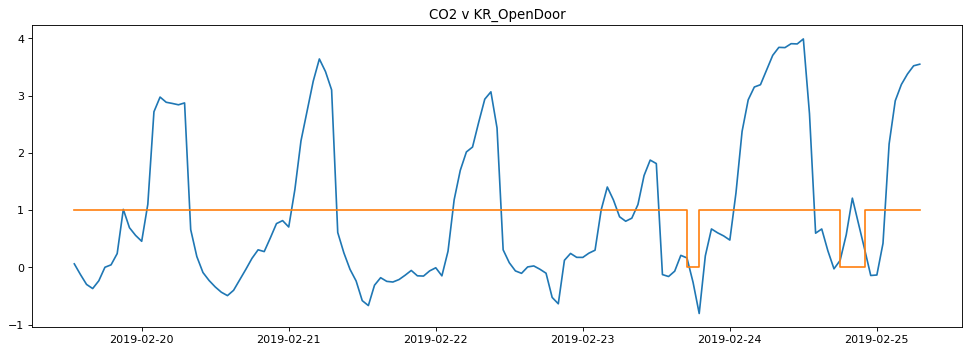

KeyError: 'KR_Boiling'

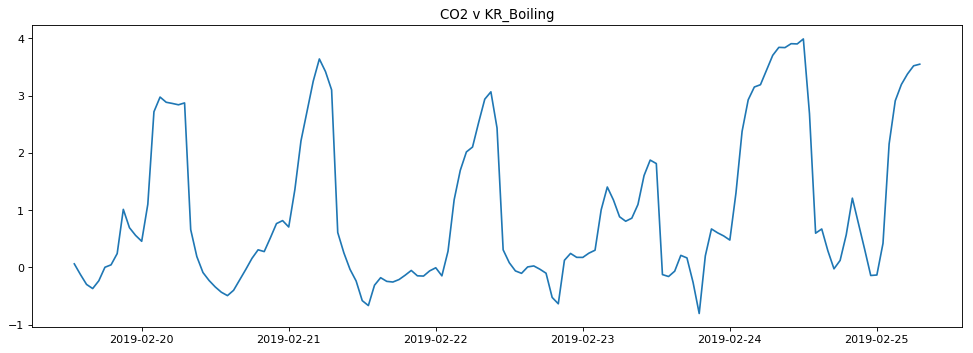

In [21]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.step(x=BR3.index, y=BR3["BR_MaxOccupancy"]);
plt.title('CO2 v BR_MaxOccupancy')
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.step(x=BR3.index, y=BR3["BR_OpenWindows"]);
plt.title('CO2 v BR_OpenWindows')
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v BR_OpenDoor')
plt.step(x=BR3.index, y=BR3["BR_OpenDoor"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v BR_OpenCurtains')
plt.step(x=BR3.index, y=BR3["BR_OpenCurtains"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v BR_HeatingOn')
plt.step(x=BR3.index, y=BR3["BR_HeatingOn"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v BR_Hoovering')
plt.step(x=BR3.index, y=BR3["BR_Hoovering"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v BR_Mopping')
plt.step(x=BR3.index, y=BR3["BR_Mopping"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v LR_MaxOccupancy')
plt.step(x=BR3.index, y=BR3["LR_MaxOccupancy"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v LR_OpenWindow')
plt.step(x=BR3.index, y=BR3["LR_OpenWindow"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v LR_OpenDoor')
plt.step(x=BR3.index, y=BR3["LR_OpenDoor"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v LR_OpenCurtains')
plt.step(x=BR3.index, y=BR3["LR_OpenCurtains"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v LR_HeatingOn')
plt.step(x=BR3.index, y=BR3["LR_HeatingOn"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v LR_Hoovering')
plt.step(x=BR3.index, y=BR3["LR_Hoovering"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v LR_Mopping')
plt.step(x=BR3.index, y=BR3["LR_Mopping"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v KR_OpenDoor')
plt.step(x=BR3.index, y=BR3["KR_OpenDoor"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v KR_Boiling')
plt.step(x=BR3.index, y=BR3["KR_Boiling"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v KR_Frying')
plt.step(x=BR3.index, y=BR3["KR_Frying"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v KR_HeatingOn')
plt.step(x=BR3.index, y=BR3["KR_HeatingOn"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v KR_Hoovering')
plt.step(x=BR3.index, y=BR3["KR_Hoovering"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v KR_Mopping')
plt.step(x=BR3.index, y=BR3["KR_Mopping"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v DishwasherOn')
plt.step(x=BR3.index, y=BR3["DishwasherOn"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v WashingMachineOn')
plt.step(x=BR3.index, y=BR3["WashingMachineOn"]);
plt.show()

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(BR3["CO2"])
plt.title('CO2 v Toaster')
plt.step(x=BR3.index, y=BR3["Toaster"]);
plt.show()

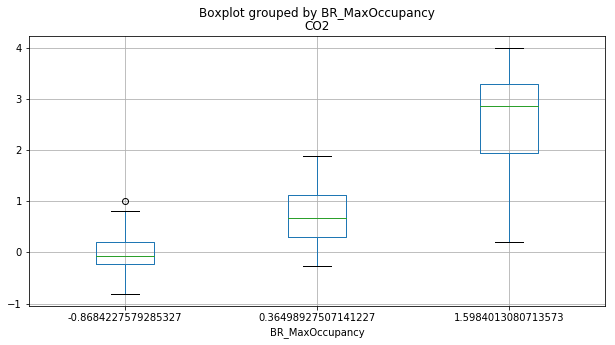

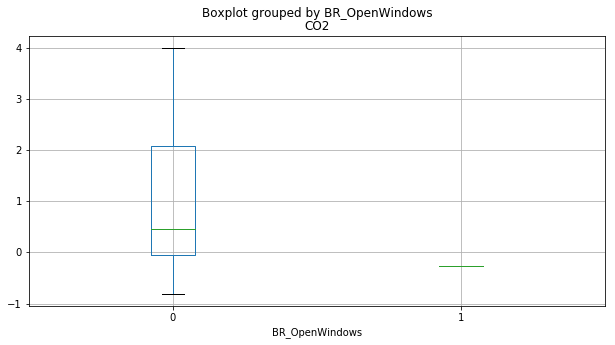

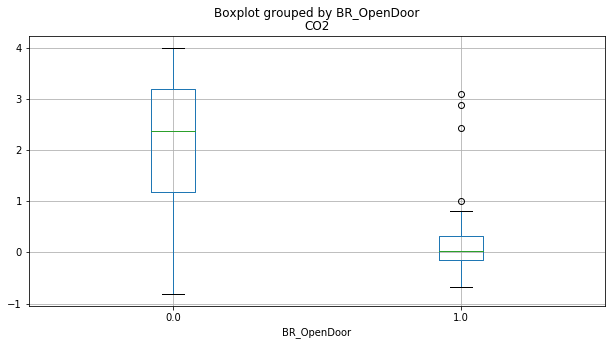

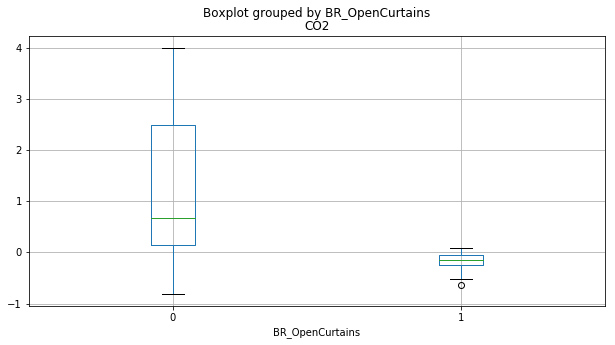

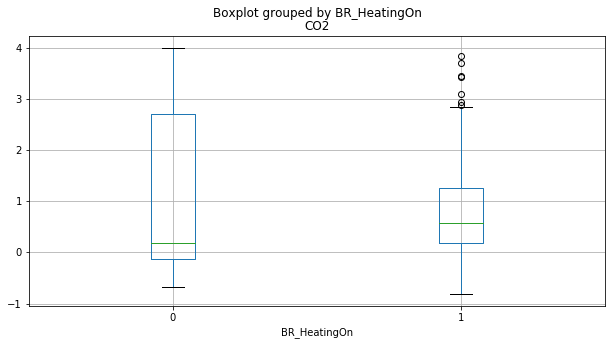

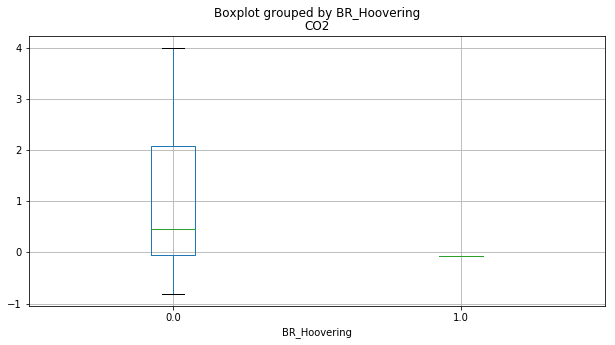

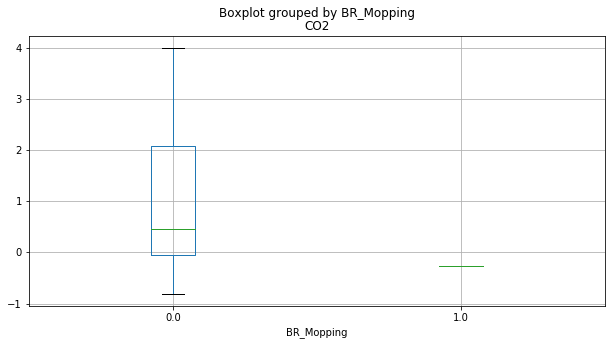

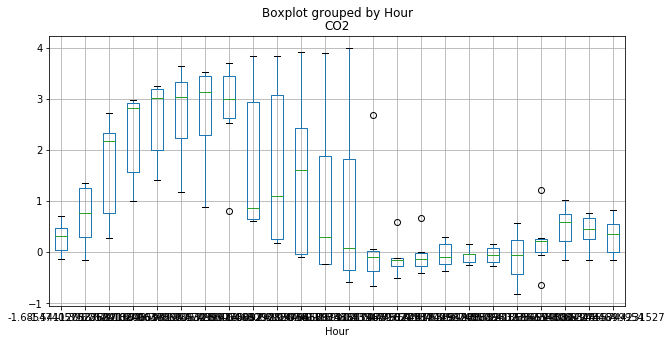

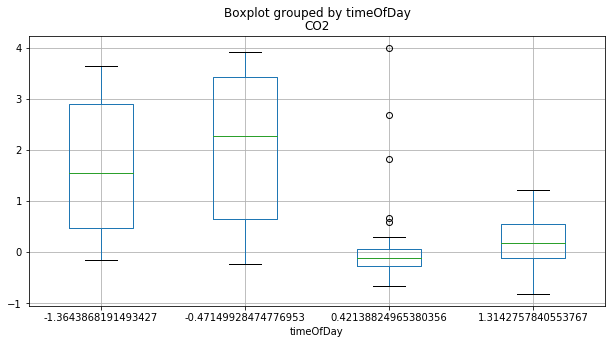

In [23]:
BR3.boxplot(column=['CO2'], by='BR_MaxOccupancy', figsize=(10, 5))
BR3.boxplot(column=['CO2'], by='BR_OpenWindows', figsize=(10, 5))
BR3.boxplot(column=['CO2'], by='BR_OpenDoor', figsize=(10, 5))
BR3.boxplot(column=['CO2'], by='BR_OpenCurtains', figsize=(10, 5))
BR3.boxplot(column=['CO2'], by='BR_HeatingOn', figsize=(10, 5))
BR3.boxplot(column=['CO2'], by='BR_Hoovering', figsize=(10, 5))
BR3.boxplot(column=['CO2'], by='BR_Mopping', figsize=(10, 5))
BR3.boxplot(column=['CO2'], by='Hour', figsize=(10, 5))
BR3.boxplot(column=['CO2'], by='timeOfDay', figsize=(10, 5));

In [24]:
print("House 1 - Bedroom")
print(IAQ_BR["CO2"] [(IAQ_BR["House"] == 1) & (IAQ_BR["Calibration"] == 0)].describe())
print ('\n')
print("House 1 - Living Room")
print(IAQ_LR["CO2"] [(IAQ_LR["House"] == 1) & (IAQ_LR["Calibration"] == 0)].describe())
print ('\n')
print("House 1 - Kitchen")
print(IAQ_KR["CO2"] [(IAQ_KR["House"] == 1) & (IAQ_KR["Calibration"] == 0)].describe())
print ('\n')
print("House 2 - Bedroom")
print(IAQ_BR["CO2"] [(IAQ_BR["House"] == 2) & (IAQ_BR["Calibration"] == 0)].describe())
print ('\n')
print("House 2 - Living Room")
print(IAQ_LR["CO2"] [(IAQ_LR["House"] == 2) & (IAQ_LR["Calibration"] == 0)].describe())
print ('\n')
print("House 2 - Kitchen")
print(IAQ_KR["CO2"] [(IAQ_KR["House"] == 2) & (IAQ_KR["Calibration"] == 0)].describe())
print ('\n')
print("House 3 - Bedroom")
print(IAQ_BR["CO2"] [(IAQ_BR["House"] == 3) & (IAQ_BR["Calibration"] == 0)].describe())
print ('\n')
print("House 3 - Living Room")
print(IAQ_LR["CO2"] [(IAQ_LR["House"] == 3) & (IAQ_LR["Calibration"] == 0)].describe())
print ('\n')
print("House 3 - Kitchen")
print(IAQ_KR["CO2"] [(IAQ_KR["House"] == 3) & (IAQ_KR["Calibration"] == 0)].describe())

House 1 - Bedroom
count    138.000000
mean       0.776808
std        1.596258
min       -0.867557
25%       -0.609169
50%       -0.052127
75%        1.977726
max        4.419305
Name: CO2, dtype: float64


House 1 - Living Room
count    145.000000
mean      -0.621893
std        0.289864
min       -0.931391
25%       -0.855203
50%       -0.686835
75%       -0.496279
max        0.416485
Name: CO2, dtype: float64


House 1 - Kitchen
count    143.000000
mean      -0.693202
std        0.301733
min       -1.051818
25%       -0.905860
50%       -0.777459
75%       -0.544148
max        0.266220
Name: CO2, dtype: float64


House 2 - Bedroom
count    140.000000
mean      -0.403259
std        0.421546
min       -0.868483
25%       -0.749270
50%       -0.571302
75%       -0.113297
max        0.744519
Name: CO2, dtype: float64


House 2 - Living Room
count    140.000000
mean      -0.228439
std        0.547437
min       -0.922460
25%       -0.648447
50%       -0.369605
75%       -0.000237
max       